In [66]:
%matplotlib inline

import numpy as np
import scipy as sp
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def target_pdf(x):
    a = norm(-4,0.5)
    b = norm(4,1)
    return a.pdf(x) + b.pdf(x)

def sampler(mu_init=.5, proposal_width=.5, samples=1000):
    
    mu_current = mu_init
    posterior = [mu_current]
    accepted = 0
    
    for i in range(samples):
        # suggest new position
        mu_proposal = norm(mu_current, proposal_width).rvs()
      
        #calculat probabilities given the target pdf
        p_current = target_pdf(mu_current)
        p_proposal = target_pdf(mu_proposal)
        
        # Accept proposal?
        p_accept = p_proposal / p_current
        
        # Usually would include prior probability, which we neglect here for simplicity
        accept = np.random.rand() < p_accept
        
        if accept:
            # Update position
            mu_current = mu_proposal
            accepted += 1
        
        posterior.append(mu_current)
        acceptance_rate = accepted/samples
        
    return acceptance_rate, posterior

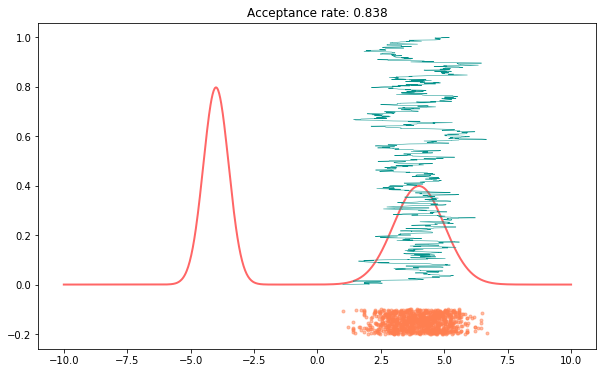

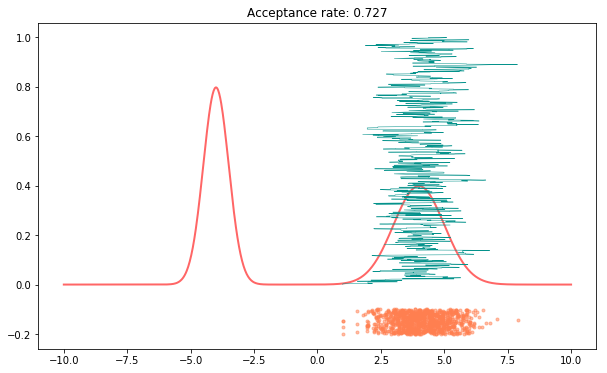

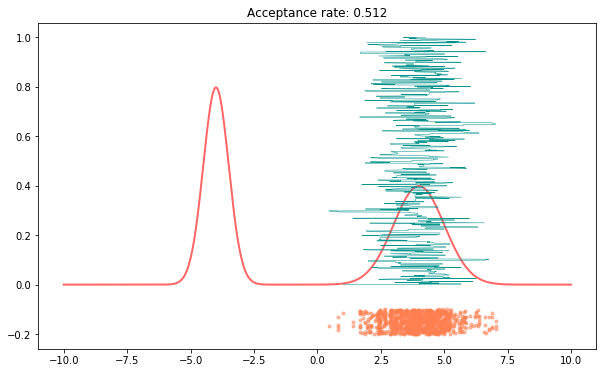

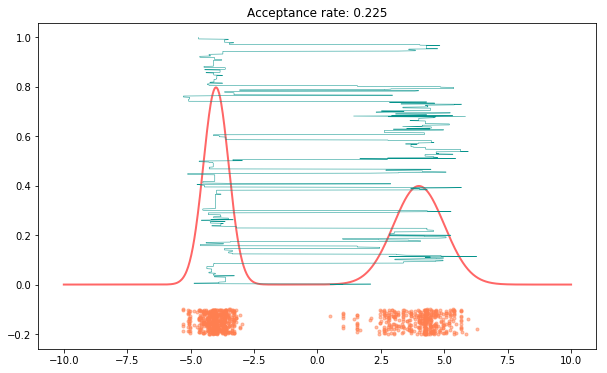

In [109]:
proposal_width = [0.5,1,2,4]
x = np.linspace(-10,10,1000)
y = np.linspace(0,1,len(posterior))


for width in proposal_width:
    acceptance_rate, posterior = sampler(mu_init=1, proposal_width=width)
    plt.figure(figsize = (10,6))
    plt.plot(x, target_pdf(x), 'r-', lw=2, alpha=0.6)
    plt.plot(posterior, sp.stats.uniform.rvs(loc=-0.2, scale=0.1, size=len(posterior)),'.', alpha=0.5, color = 'coral')
    plt.plot(posterior, y,color="#04928B",linewidth = 0.5)
    plt.title("Acceptance rate: "+str(acceptance_rate))